*IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS*



In [ ]:
import pandas as pd #é uma base de dados para manipulação e tratamento dos dados (dataframe)
import numpy as np #é uma biblioteca para se trabalhar com matrizes
import plotly as py #é um módulo de gráficos
import seaborn as sns #é uma biblioteca de visualização de dados
from matplotlib import pyplot as plt #usada para visualizar e plotar gráficos
import plotly.graph_objs as go #Este pacote importa definições para todos os objetos gráficos do Plotly. 
from sklearn.datasets import make_blobs #usada para gerar bolhas de pontos com uma distribuição Gaussiana
from sklearn.cluster import KMeans #usado para construir o kmeans

*CHAMANDO A BASE DE DADOS (É NECESSÁRIO CARREGA-LA NO COLAB - FAÇA ISSO NO QUARTO ITEM AO LADO ESQUERDO - NA PASTINHA)*

In [ ]:
#Se necessário, troque o caminho do arquivo.

df = pd.read_csv('/content/Consumo.csv', sep=',', encoding='1252') #pd é pra chamar o pandas e read_csv serve para ler o excel
df.head() #usado para ver as primeira linhas da base

,Cod,Sexo,Idade,Salario Anual (milhares),Score Gastos (0-100)
0,1,Masculino,19,17,39
1,2,Masculino,21,17,81
2,3,Feminino,20,19,6
3,4,Feminino,23,19,77
4,5,Feminino,31,20,40


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip # é uma ferramenta que gera informações estatísticas (estatística descritiva) do seu dataframe de forma intuitiva

In [6]:
from pandas_profiling import ProfileReport #usado para contruir as estatísticas descritivas

In [ ]:
profile = ProfileReport(df, title='Relatorio - pandas profiling', html={'style':{'full_width':True}}) #primeiro colocar a base, título e estilo do html gerado
profile #assim, consegue-se ter um perfil da base de dados

In [9]:
profile.to_file(output_file='Kmenas.html') #aqui é exportado o relatório gerado pelo profile (deve-se fazer o download do arquivo ao lado na pastinha e abri-lo)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

*PLOTANDO O GRÁFICO DE RENDA X PONTUAÇÃO*

---



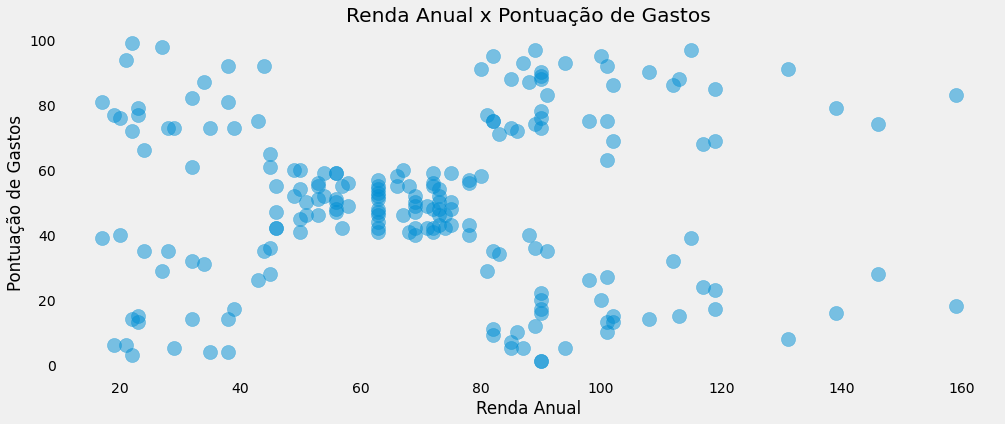

In [31]:
plt.style.use('fivethirtyeight') #outro estilo de gráfico
plt.figure(1, figsize=[15,6]) #altera o tamanho do gráfico
plt.scatter(x = 'Salario Anual (milhares)', y = 'Score Gastos (0-100)', data = df, s=200, alpha=0.5) #gráfico de dispersão, s é o tamanho e alpha a transparência dos pontos
plt.title('Renda Anual x Pontuação de Gastos'), plt.xlabel('Renda Anual'),plt.ylabel('Pontuação de Gastos') #titulo e labels
plt.grid() #tira as linhas no meio do gráfico
plt.show()

*EXECUÇÃO DO KMEANS COM 1 CLUSTERS*

[[70.14 50.2 ]]
316772.0800000001


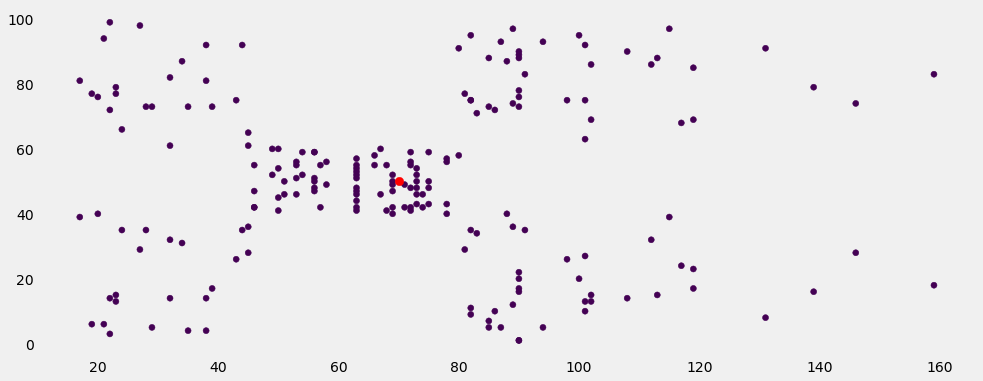

In [41]:
X2 = df[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values #esse método iloc pega os eixos que são textos e os trata
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2) #usa-se o X2 pois ele tratou os eixos da forma correta
print(kmeans.cluster_centers_) #mostra a coordenada dos clusters centers
print(kmeans.inertia_) #mostra o método inertia que faz a inteligencia do quadrado das distâncias

plt.figure(1, figsize=[15,6]) #altera o tamanho do gráfico
plt.scatter(X2[:,0], X2[:,1], c=pred_y) #[:,0], X[:,1] serve para plotar todos os atributos, o c serve para colorir os grupos
plt.grid() #tira as linhas no meio do gráfico

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red') #plotando os centroides do kmeans
plt.show()

*EXECUÇÃO DO KMEANS COM 2 CLUSTERS*

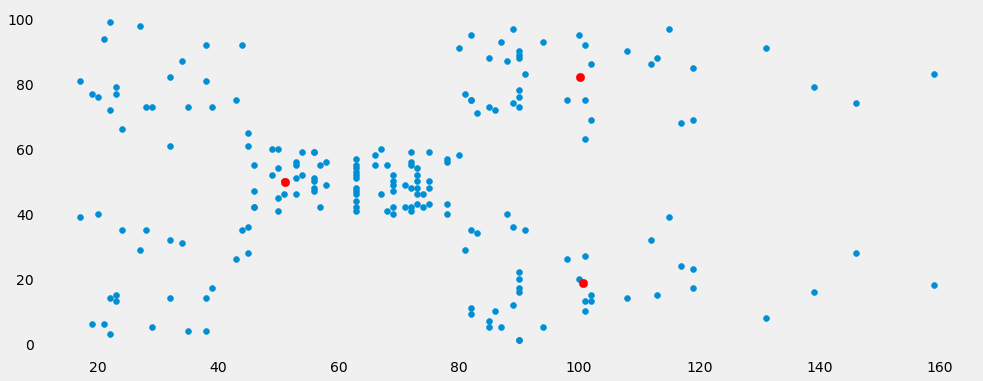

In [33]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2) #usa-se o X2 pois ele tratou os eixos da forma correta. O predict percorre a base inteira aplicando o método
print(kmeans.cluster_centers_) #mostra a coordenada dos clusters centers
print(kmeans.inertia_) #mostra o método inertia que faz a inteligencia do quadrado das distâncias


plt.figure(1, figsize=[15,6]) #altera o tamanho do gráfico
plt.scatter(X2[:,0], X2[:,1]) #[:,0], X[:,1] serve para plotar todos os atributos
plt.grid() #tira as linhas no meio do gráfico

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red') #plotando os centroides do kmeans
plt.show()

*EXECUÇÃO DO KMEANS COM 6 CLUSTERS*

[[ 30.43478261  20.91304348]
 [127.          82.        ]
 [102.11428571  17.11428571]
 [ 64.09876543  49.51851852]
 [ 29.77272727  79.36363636]
 [ 90.93103448  82.17241379]]
44510.95061937526
A o número de clusters é:  6
A coordenada de cada centróide é:  [[ 30.43478261  20.91304348]
 [127.          82.        ]
 [102.11428571  17.11428571]
 [ 64.09876543  49.51851852]
 [ 29.77272727  79.36363636]
 [ 90.93103448  82.17241379]]
A soma dos quadrados intra-clusters (wcss) do centroíde é:  44510.95061937526


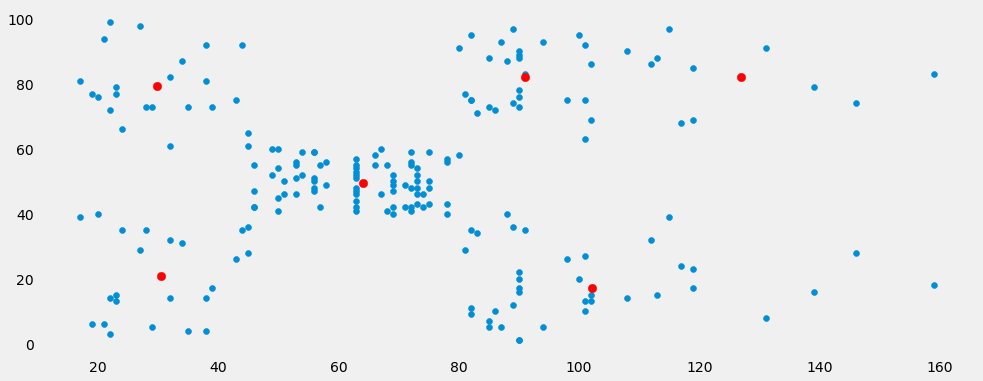

In [43]:
#não precisa chamar a base X2 novamente
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2) #usa-se o X2 pois ele tratou os eixos da forma correta
print(kmeans.cluster_centers_) #mostra a coordenada dos clusters centers
print(kmeans.inertia_) #mostra o método inertia que faz a inteligencia do quadrado das distâncias

print('A o número de clusters é: ', kmeans.n_clusters)
print('A coordenada de cada centróide é: ', kmeans.cluster_centers_) 
print('A soma dos quadrados intra-clusters (wcss) do centroíde é: ', kmeans.inertia_)

plt.figure(1, figsize=[15,6]) #altera o tamanho do gráfico
plt.scatter(X2[:,0], X2[:,1]) #[:,0], X[:,1] serve para plotar todos os atributos
plt.grid() #tira as linhas no meio do gráfico

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red') #plotando os centroides do kmeans
plt.show()

*EXIBIÇÃO DA CURVA DO COTOVELO, MOSTRANDO AS ITERAÇÕES E O NÚMERO IDEAL DE CLUSTERS*

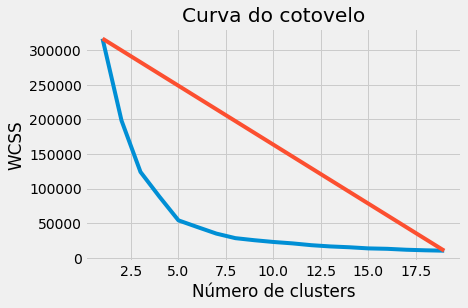

In [36]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_) #o número ideal de clusters será o ponto onde a curva começa a se estabilizar
plt.plot(range(1, 20), wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]]) #plotar a linha secante
plt.title('Curva do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

*EXECUÇÃO DO KMEANS COM O NÚMERO IDEAL DE CLUSTERS*

[[ 29.77272727  79.36363636]
 [102.11428571  17.11428571]
 [ 64.09876543  49.51851852]
 [100.17948718  82.12820513]
 [ 30.43478261  20.91304348]]
54185.05318347782


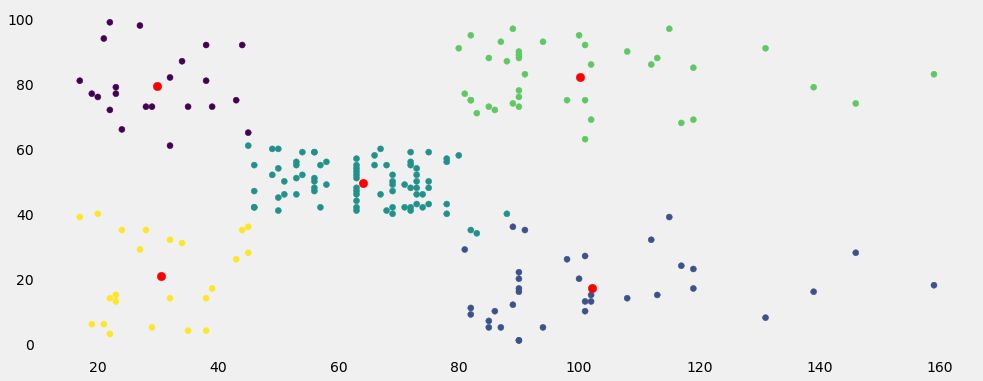

In [39]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2) #usa-se o X2 pois ele tratou os eixos da forma correta
print(kmeans.cluster_centers_) #mostra a coordenada dos clusters centers
print(kmeans.inertia_) #mostra o método inertia que faz a inteligencia do quadrado das distâncias

plt.figure(1, figsize=[15,6]) #altera o tamanho do gráfico
plt.scatter(X2[:,0], X2[:,1], c=pred_y) #[:,0], X[:,1] serve para plotar todos os atributos, o c serve para colorir os grupos
plt.grid() #tira as linhas no meio do gráfico

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red') #plotando os centroides do kmeans
plt.show()